In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss,roc_auc_score,accuracy_score,confusion_matrix
import seaborn as sns 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [5]:
train1 = pd.read_csv(r'E:\project\FINAL\features.csv')


In [6]:
train1.head(15)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,health,absences,G1,G2,G3,subject,FinalGrade,Regularity,Grade1,Grade2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,6,5,6,6,maths,Poor,Always Regular,Failure,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,4,5,5,6,maths,Poor,Always Regular,Failure,Failure
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,10,7,8,10,maths,Poor,Mostly Regular,Poor,Poor
3,GP,F,15,U,GT3,T,4,2,health,services,...,5,2,15,14,15,maths,Good,Always Regular,Good,Satisfactory
4,GP,F,16,U,GT3,T,3,3,other,other,...,5,4,6,10,10,maths,Poor,Always Regular,Poor,Poor
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,10,15,15,15,maths,Good,Mostly Regular,Good,Good
6,GP,M,16,U,LE3,T,2,2,other,other,...,3,0,12,12,11,maths,Satisfactory,Always Regular,Satisfactory,Satisfactory
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,6,6,5,6,maths,Poor,Always Regular,Poor,Failure
8,GP,M,15,U,LE3,A,3,2,services,other,...,1,0,16,18,19,maths,Excellent,Always Regular,Good,Excellent
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,0,14,15,15,maths,Good,Always Regular,Satisfactory,Good


In [7]:
le=preprocessing.LabelEncoder()
le.fit(train1['FinalGrade'])
train1['FinalGrade']=le.transform(train1['FinalGrade'])
y=train1['FinalGrade']
# train1 = train1.drop(labels=['Regularity','Grade1','Grade2'],axis=1)

train1 = pd.get_dummies(train1)

train1.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,0,0,0,1,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,0,0,1,0,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,0,0,0,0,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,0,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,0,1,0,0,0,0,1,0,0
6,16,2,2,1,2,0,4,4,4,1,...,0,0,0,0,1,0,0,0,0,1
7,17,4,4,2,2,0,4,1,4,1,...,0,0,0,1,0,0,1,0,0,0
8,15,3,2,1,2,0,4,2,2,1,...,0,0,1,0,0,1,0,0,0,0
9,15,3,4,1,2,0,5,5,1,1,...,0,0,0,0,1,0,0,1,0,0


In [8]:
# y=train1.FinalGrade
train1 = train1.drop(labels=['G3','FinalGrade'],axis=1)
train1.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,0,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,1,0,0,0,0,1,0,0,0
2,15,1,1,1,2,3,4,3,2,2,...,0,0,0,1,0,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,0,0,0,0,0,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,0,0,1,0


In [9]:
x_train,x_val,y_train,y_val = train_test_split(train1,y,random_state=0,test_size=0.3)
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)


(276, 73)
(276,)
(119, 73)
(119,)


In [10]:
x_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
22,16,4,2,1,2,0,4,5,1,1,...,0,0,1,0,0,0,0,1,0,0
241,17,4,4,2,2,0,3,3,3,2,...,0,0,0,1,0,0,0,0,0,1
122,16,2,4,2,2,0,4,2,2,1,...,0,0,0,0,1,0,0,0,0,1
176,16,2,2,2,2,0,3,4,4,1,...,0,0,0,0,1,0,0,0,0,1
162,16,1,2,2,1,1,4,4,4,2,...,0,0,0,1,0,0,1,0,0,0


In [13]:
y_train.head()

22     2
241    4
122    4
176    4
162    1
Name: FinalGrade, dtype: int32

In [9]:
x_val.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Grade1_Excellent,Grade1_Failure,Grade1_Good,Grade1_Poor,Grade1_Satisfactory,Grade2_Excellent,Grade2_Failure,Grade2_Good,Grade2_Poor,Grade2_Satisfactory
329,17,4,4,2,3,0,4,3,3,1,...,0,0,0,0,1,0,0,0,0,1
318,17,3,4,1,3,0,4,3,4,2,...,0,0,0,0,1,0,0,0,0,1
317,18,4,3,1,3,0,4,3,4,1,...,0,0,0,1,0,0,0,0,1,0
65,16,4,3,3,2,0,5,4,3,1,...,0,0,1,0,0,0,0,1,0,0
59,16,4,2,1,2,0,4,2,3,1,...,0,0,1,0,0,0,0,1,0,0


In [10]:
y_val.head()

329    4
318    3
317    3
65     2
59     2
Name: FinalGrade, dtype: int32

In [11]:
def confusionmatrix(y_val,y_pred):
    labels = list(range(0,5))
    cm=confusion_matrix(y_val,y_pred)
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    FP = cm.sum(axis=0) - np.diag(cm)  
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    total = lambda x : x.sum()/5
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print('percentage of sensitivity = '+str(total(TPR)*100))

    # Specificity or true negative rate
    TNR = TN/(TN+FP) 

    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print('percentage of precision = '+str(total(PPV)*100))
    # Negative predictive value
    NPV = TN/(TN+FN)

    # Fall out or false positive rate
    FPR = FP/(FP+TN)

    # False negative rate
    FNR = FN/(TP+FN)

    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('Accuracy percentage = '+str(total(ACC)*100))

In [51]:
###  LOGISTIC REGRESSION  ###
#from sklearn.metrics import plot_confusion_matrix
def logistic_regression(x_train,y_train,x_val,y_val):
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    print("Logistic Regression Model Score" , ":" , lr.score(x_train, y_train) , "," ,
              "Cross Validation Score" ,":" , lr.score(x_val, y_val))
    y_pred = lr.predict(x_val)
    y_predict = lr.predict_proba(x_val)
    print("Log_Loss: ",log_loss(y_val,y_predict))
    print("Accuracy_Score: ",accuracy_score(y_val,y_pred))
    confusionmatrix(y_val,y_pred)
    #plot_confusion_matrix(lr,x_val,y_val)
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1', 'Class 2','Çlass 3', 'Class 4']))
   
    return y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model Score : 0.9202898550724637 , Cross Validation Score : 0.8067226890756303
Log_Loss:  0.6304120284250447
Accuracy_Score:  0.8067226890756303
percentage of sensitivity = 78.7071702244116
percentage of precision = 83.98056290829831
Accuracy percentage = 92.26890756302521

Classification Report

              precision    recall  f1-score   support

     Class 0       1.00      0.62      0.77         8
     Class 1       0.79      0.71      0.75        21
     Class 2       0.82      0.88      0.85        16
     Çlass 3       0.83      0.76      0.79        45
     Class 4       0.76      0.97      0.85        29

    accuracy                           0.81       119
   macro avg       0.84      0.79      0.80       119
weighted avg       0.82      0.81      0.80       119



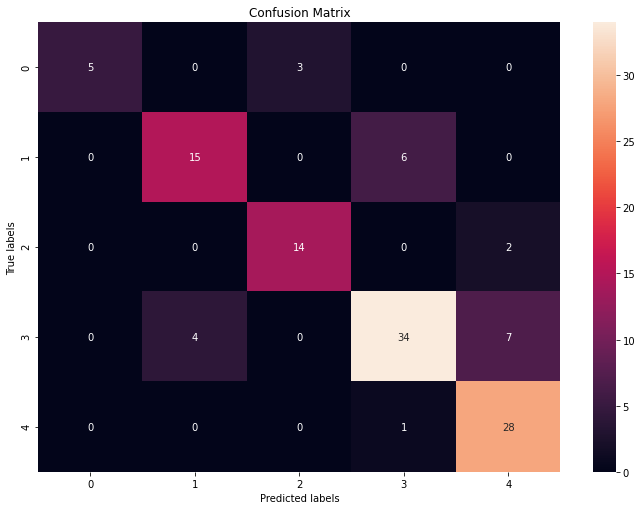

In [52]:
y_score =logistic_regression(x_train,y_train,x_val,y_val)

In [59]:
def random_forest(x_train,y_train,x_val,y_val):
    random_forest = RandomForestClassifier(n_estimators=36,min_samples_leaf=2,random_state=0)

    f = random_forest.fit(x_train, y_train)
    print("Random Forest Model Score" , ":" , f.score(x_train, y_train) , "," ,
              "Cross Validation Score" ,":" , f.score(x_val, y_val))
    Y_pred = random_forest.predict_proba(x_val)
    Y_pred1 = random_forest.predict(x_val)
    print("Log_Loss: ",log_loss(y_val,Y_pred))
    print("Accuracy_Score: ",accuracy_score(y_val,Y_pred1))
    confusionmatrix(y_val,Y_pred1)
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_val, Y_pred1, target_names=['Class 0', 'Class 1', 'Class 2','Çlass 3', 'Class 4']))
   


Random Forest Model Score : 0.9311594202898551 , Cross Validation Score : 0.8067226890756303
Log_Loss:  0.6013607689782979
Accuracy_Score:  0.8067226890756303
percentage of sensitivity = 80.03338806787083
percentage of precision = 85.31687919923215
Accuracy percentage = 92.26890756302521

Classification Report

              precision    recall  f1-score   support

     Class 0       1.00      0.88      0.93         8
     Class 1       0.77      0.48      0.59        21
     Class 2       0.93      0.88      0.90        16
     Çlass 3       0.75      0.84      0.79        45
     Class 4       0.82      0.93      0.87        29

    accuracy                           0.81       119
   macro avg       0.85      0.80      0.82       119
weighted avg       0.81      0.81      0.80       119



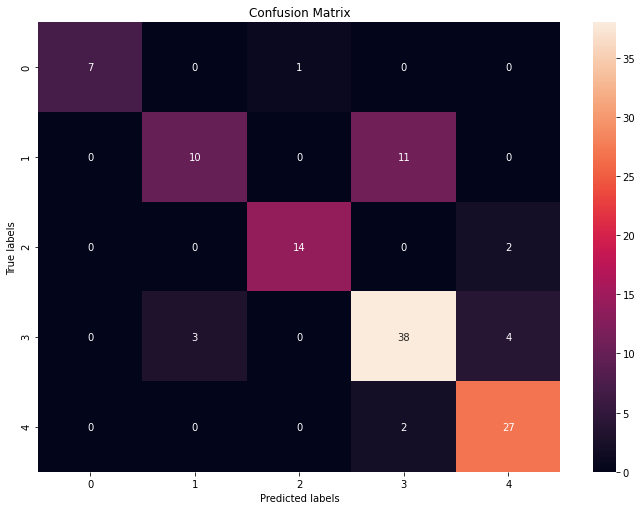

In [60]:
random_forest(x_train,y_train,x_val,y_val)

In [69]:
def SVM_Model(X_train,Y_train,X_test,y_val):
    svc = SVC()
    svc.fit(X_train, Y_train)
    y_pred = svc.predict(X_test)
#   y_predict = svc.predict_proba(X_test)
#   print("Accuracy_train: ",accuracy_score(y_val,y_predict))
#    print("Accuracy_val: ",accuracy_score(y_val,y_predict))
    print("SVC Model Score" , ":" , svc.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , svc.score(X_test, y_val))
   # print("Log_Loss: ",log_loss(y_val,y_predict))
    confusionmatrix(y_val,y_pred)
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1', 'Class 2','Çlass 3', 'Class 4']))
   

SVC Model Score : 0.8007246376811594 , Cross Validation Score : 0.6974789915966386
percentage of sensitivity = 55.331007115489875
percentage of precision = nan
Accuracy percentage = 87.89915966386553

Classification Report

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         8
     Class 1       1.00      0.43      0.60        21
     Class 2       0.56      0.56      0.56        16
     Çlass 3       0.73      0.84      0.78        45
     Class 4       0.64      0.93      0.76        29

    accuracy                           0.70       119
   macro avg       0.59      0.55      0.54       119
weighted avg       0.69      0.70      0.66       119



<ipython-input-11-0477686b44b2>:26: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-11-0477686b44b2>:38: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


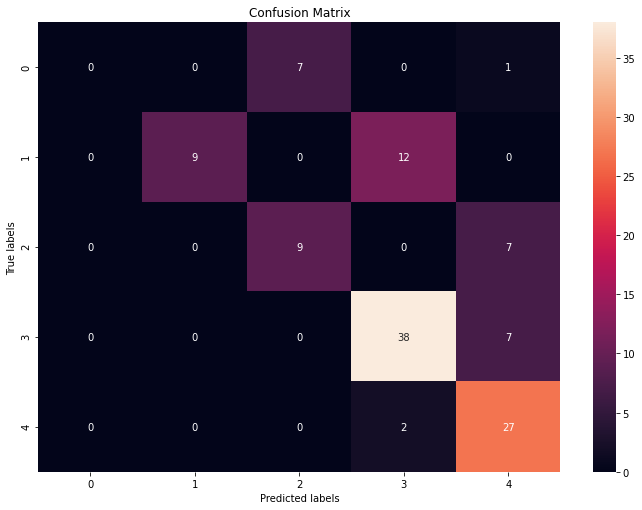

In [70]:
SVM_Model(x_train,y_train,x_val,y_val)

Log_Loss:  1.0066775049197836
Decisioin Tree Model Score : 0.8260869565217391 , Cross Validation Score : 0.7478991596638656
percentage of sensitivity = 67.10481663929939
percentage of precision = nan
Accuracy percentage = 89.91596638655463

Classification Report

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         8
     Class 1       0.61      0.90      0.73        21
     Class 2       0.64      0.88      0.74        16
     Çlass 3       0.88      0.64      0.74        45
     Class 4       0.82      0.93      0.87        29

    accuracy                           0.75       119
   macro avg       0.59      0.67      0.62       119
weighted avg       0.73      0.75      0.72       119



<ipython-input-11-0477686b44b2>:26: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-11-0477686b44b2>:38: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


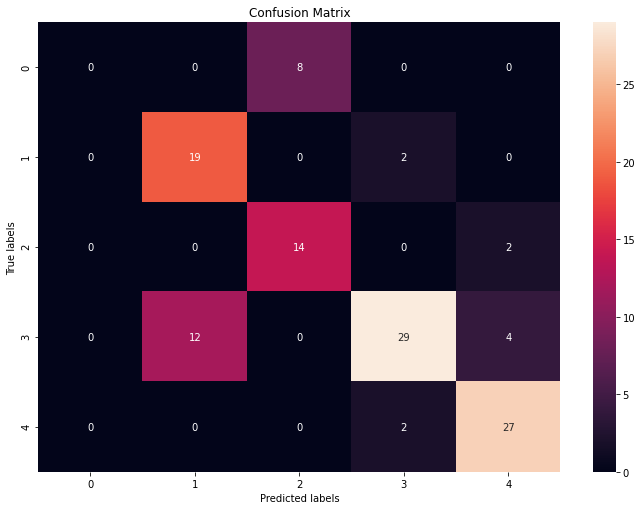

In [71]:
def Decison_tree_Model(x_train,y_train,x_val,y_val):
    tree = DecisionTreeClassifier(min_samples_leaf=17)
    t= tree.fit(x_train, y_train)
    y_pred = t.predict(x_val)
    y_predict = t.predict_proba(x_val)
    print("Log_Loss: ",log_loss(y_val,y_predict))
    print("Decisioin Tree Model Score" , ":" , t.score(x_train, y_train) , "," , 
          "Cross Validation Score" ,":" , t.score(x_val, y_val))
    confusionmatrix(y_val,y_pred)
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1', 'Class 2','Çlass 3', 'Class 4']))

Decison_tree_Model(x_train,y_train,x_val,y_val)

Ada Boost Model Score : 0.7789855072463768 , Cross Validation Score : 0.6890756302521008
Log_Loss:  0.9076640434511447
percentage of sensitivity = 54.34291187739463
percentage of precision = nan
Accuracy percentage = 87.56302521008402

Classification Report



<ipython-input-11-0477686b44b2>:26: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-11-0477686b44b2>:38: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         8
     Class 1       0.00      0.00      0.00        21
     Class 2       0.64      0.88      0.74        16
     Çlass 3       0.64      0.91      0.75        45
     Class 4       0.82      0.93      0.87        29

    accuracy                           0.69       119
   macro avg       0.42      0.54      0.47       119
weighted avg       0.53      0.69      0.60       119



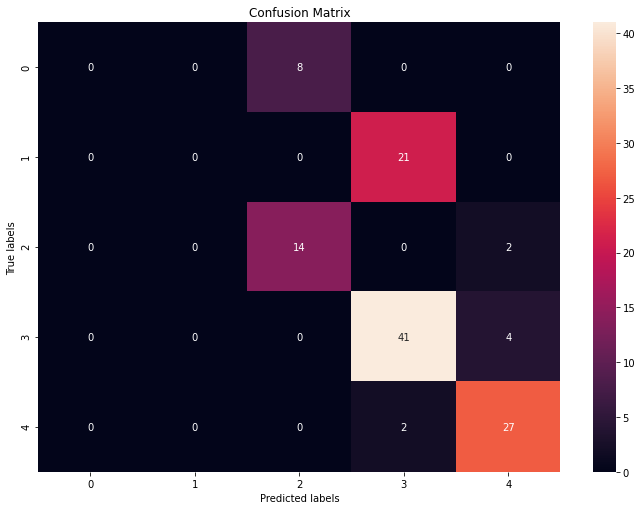

In [72]:
def ada_boost_model(x_train,y_train,x_val,y_val):
    ada = AdaBoostClassifier(n_estimators=2)
    af = ada.fit(x_train, y_train)
    y_pred = af.predict(x_val)
    y_predict = af.predict_proba(x_val)
    print("Ada Boost Model Score" , ":" , af.score(x_train, y_train) , "," ,
          "Cross Validation Score" ,":" , af.score(x_val, y_val))
    print("Log_Loss: ",log_loss(y_val,y_predict))
    confusionmatrix(y_val,y_pred)
    from sklearn.metrics import classification_report
    print('\nClassification Report\n')
    print(classification_report(y_val, y_pred, target_names=['Class 0', 'Class 1', 'Class 2','Çlass 3', 'Class 4']))

ada_boost_model(x_train,y_train,x_val,y_val)